<a href="https://colab.research.google.com/github/kayiwa/SBU_ML_CYBER/blob/main/capstone_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Ignore warnings because ugh!

In [3]:
# Filter the uneccesary warnings
import warnings
warnings.filterwarnings("ignore")

Import the libraries we will need

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# Fix the random seed
np.random.seed(7)
from collections import Counter
from sklearn.model_selection import train_test_split
# Make plots appear within the notebook
%matplotlib inline

Grab our data

In [5]:
dataset = pd.read_csv('phishing.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

print the shape of our data

In [ ]:
dataset.shape

(11054, 32)

In [ ]:
# the top 5
print(dataset.head(5))

   Index  UsingIP  LongURL  ...  LinksPointingToPage  StatsReport  class
0      0        1        1  ...                    1            1     -1
1      1        1        0  ...                    0           -1     -1
2      2        1        0  ...                   -1            1     -1
3      3        1        0  ...                    1            1      1
4      4       -1        0  ...                   -1           -1      1

[5 rows x 32 columns]


In [ ]:
# the last 5
print(dataset.tail(5))

       Index  UsingIP  LongURL  ...  LinksPointingToPage  StatsReport  class
11049  11049        1       -1  ...                    1            1      1
11050  11050       -1        1  ...                   -1            1     -1
11051  11051        1       -1  ...                    0            1     -1
11052  11052       -1       -1  ...                    1            1     -1
11053  11053       -1       -1  ...                    1           -1     -1

[5 rows x 32 columns]


In [ ]:
# random 5
dataset.sample(5).T

,6837,6237,10983,173,6663
Index,6837,6237,10983,173,6663
UsingIP,1,-1,-1,1,-1
LongURL,-1,-1,-1,-1,-1
ShortURL,1,1,1,1,-1
Symbol@,1,1,1,1,1
Redirecting//,1,1,1,1,-1
PrefixSuffix-,-1,-1,1,-1,-1
SubDomains,-1,0,-1,0,1
HTTPS,-1,-1,1,1,1
DomainRegLen,1,1,1,1,1


In [ ]:
dataset.dtypes

Index                  int64
UsingIP                int64
LongURL                int64
ShortURL               int64
Symbol@                int64
Redirecting//          int64
PrefixSuffix-          int64
SubDomains             int64
HTTPS                  int64
DomainRegLen           int64
Favicon                int64
NonStdPort             int64
HTTPSDomainURL         int64
RequestURL             int64
AnchorURL              int64
LinksInScriptTags      int64
ServerFormHandler      int64
InfoEmail              int64
AbnormalURL            int64
WebsiteForwarding      int64
StatusBarCust          int64
DisableRightClick      int64
UsingPopupWindow       int64
IframeRedirection      int64
AgeofDomain            int64
DNSRecording           int64
WebsiteTraffic         int64
PageRank               int64
GoogleIndex            int64
LinksPointingToPage    int64
StatsReport            int64
class                  int64
dtype: object

In [87]:

# dataset.iloc[:,0: -1].count()
# dataset.iloc[:,29].unique()
# Counter(dataset.iloc[:,0:33])
# dataset.iloc[:,0].sum()
# dataset.iloc[:,0].mean()
# dataset.iloc[:,0].std()
# dataset.iloc[:,0].min()
# dataset.iloc[:,0].max()

In [ ]:
# dataset.count()
# dataset.nunique()


still need to make this more human or at least Francis readable

In [ ]:
# our columns
dataset.columns.to_list()

['Index',
 'UsingIP',
 'LongURL',
 'ShortURL',
 'Symbol@',
 'Redirecting//',
 'PrefixSuffix-',
 'SubDomains',
 'HTTPS',
 'DomainRegLen',
 'Favicon',
 'NonStdPort',
 'HTTPSDomainURL',
 'RequestURL',
 'AnchorURL',
 'LinksInScriptTags',
 'ServerFormHandler',
 'InfoEmail',
 'AbnormalURL',
 'WebsiteForwarding',
 'StatusBarCust',
 'DisableRightClick',
 'UsingPopupWindow',
 'IframeRedirection',
 'AgeofDomain',
 'DNSRecording',
 'WebsiteTraffic',
 'PageRank',
 'GoogleIndex',
 'LinksPointingToPage',
 'StatsReport',
 'class']

In [ ]:
dataset.transpose().iloc[:,0:-1]


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,11013,11014,11015,11016,11017,11018,11019,11020,11021,11022,11023,11024,11025,11026,11027,11028,11029,11030,11031,11032,11033,11034,11035,11036,11037,11038,11039,11040,11041,11042,11043,11044,11045,11046,11047,11048,11049,11050,11051,11052
Index,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,11013,11014,11015,11016,11017,11018,11019,11020,11021,11022,11023,11024,11025,11026,11027,11028,11029,11030,11031,11032,11033,11034,11035,11036,11037,11038,11039,11040,11041,11042,11043,11044,11045,11046,11047,11048,11049,11050,11051,11052
UsingIP,1,1,1,1,-1,1,1,1,1,1,1,-1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,...,-1,-1,-1,-1,-1,-1,-1,1,1,-1,1,-1,1,1,-1,1,-1,-1,-1,-1,-1,1,-1,1,-1,-1,-1,1,1,1,-1,1,-1,-1,1,-1,1,-1,1,-1
LongURL,1,0,0,0,0,0,0,0,1,1,1,1,1,1,-1,-1,-1,1,1,0,0,1,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,0,0,0,0,0,1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,1,-1,-1,1,-1,-1,1,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,1,-1,-1
ShortURL,1,1,1,-1,-1,-1,1,-1,-1,1,-1,-1,-1,-1,-1,-1,1,1,1,-1,1,1,1,-1,1,1,-1,-1,1,1,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,-1,-1,1,1,1,1,1,1,-1,1,1,1,1,1,1,1,1,1
Symbol@,1,1,1,1,1,1,1,1,1,1,1,1,1,1,-1,1,1,1,1,1,1,1,1,-1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,...,-1,1,1,-1,1,1,-1,1,-1,1,1,1,1,-1,1,1,1,1,1,1,1,1,1,1,1,1,-1,-1,1,1,1,1,1,1,1,1,-1,-1,1,1
Redirecting//,1,1,1,1,-1,1,1,1,1,1,1,-1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,-1,1,1,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,-1,-1,1,1,1,1,1,1,-1,1,1,1,1,-1,1,-1,1,1
PrefixSuffix-,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,1,1,-1,-1,-1,1,-1,-1,-1,-1,-1,1,-1,1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,1,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,1,-1,-1,-1
SubDomains,0,-1,-1,1,1,-1,-1,1,-1,0,1,0,0,-1,0,1,-1,-1,-1,0,0,-1,1,1,0,0,-1,-1,-1,-1,-1,1,-1,0,-1,-1,-1,-1,0,1,...,1,1,-1,-1,0,-1,0,-1,-1,1,1,1,1,1,1,1,-1,1,0,1,-1,1,1,-1,-1,1,0,1,0,-1,1,1,1,1,-1,1,1,1,1,-1
HTTPS,1,-1,-1,1,1,-1,-1,1,1,1,-1,0,-1,1,0,1,0,1,1,1,1,-1,0,1,1,-1,1,1,1,1,1,1,1,0,-1,1,-1,1,-1,1,...,0,-1,1,-1,1,0,-1,-1,-1,1,1,1,1,1,1,-1,0,1,0,1,-1,1,1,-1,-1,-1,-1,1,1,0,-1,-1,1,-1,1,-1,1,-1,-1,-1
DomainRegLen,-1,-1,1,-1,-1,1,1,-1,-1,1,-1,1,1,-1,1,-1,1,1,-1,-1,1,-1,-1,-1,-1,1,1,-1,-1,-1,-1,-1,-1,1,-1,-1,1,-1,-1,-1,...,-1,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,1,1,-1,-1,-1,1,-1,1,-1,1,-1,-1,-1,1,-1,1,-1,-1,-1,-1,-1,-1,-1,1,1,-1,-1,-1,1


In [ ]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
Index,11054.0,5526.500000,3191.159272,0.0,2763.25,5526.5,8289.75,11053.0
UsingIP,11054.0,0.313914,0.949495,-1.0,-1.00,1.0,1.00,1.0
LongURL,11054.0,-0.633345,0.765973,-1.0,-1.00,-1.0,-1.00,1.0
ShortURL,11054.0,0.738737,0.674024,-1.0,1.00,1.0,1.00,1.0
Symbol@,11054.0,0.700561,0.713625,-1.0,1.00,1.0,1.00,1.0
Redirecting//,11054.0,0.741632,0.670837,-1.0,1.00,1.0,1.00,1.0
PrefixSuffix-,11054.0,-0.734938,0.678165,-1.0,-1.00,-1.0,-1.00,1.0
SubDomains,11054.0,0.064049,0.817492,-1.0,-1.00,0.0,1.00,1.0
HTTPS,11054.0,0.251040,0.911856,-1.0,-1.00,1.0,1.00,1.0
DomainRegLen,11054.0,-0.336711,0.941651,-1.0,-1.00,-1.0,1.00,1.0


From the above table, you can quickly how the values of the different columns are distributed in the dataset. What are the maximum and minimum values and what percentage of rows have a certain kind of value. For example, if you take a look at the third row in the above table, you will know that 25% of the total 11055 entries in the respective column has a value of -1. 

Added with the above information, you might also want to know about the data-types of the different columns and if there are any missing values present in the dataset or not.

In [88]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11054 entries, 0 to 11053
Data columns (total 32 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Index                11054 non-null  int64
 1   UsingIP              11054 non-null  int64
 2   LongURL              11054 non-null  int64
 3   ShortURL             11054 non-null  int64
 4   Symbol@              11054 non-null  int64
 5   Redirecting//        11054 non-null  int64
 6   PrefixSuffix-        11054 non-null  int64
 7   SubDomains           11054 non-null  int64
 8   HTTPS                11054 non-null  int64
 9   DomainRegLen         11054 non-null  int64
 10  Favicon              11054 non-null  int64
 11  NonStdPort           11054 non-null  int64
 12  HTTPSDomainURL       11054 non-null  int64
 13  RequestURL           11054 non-null  int64
 14  AnchorURL            11054 non-null  int64
 15  LinksInScriptTags    11054 non-null  int64
 16  ServerFormHandler    1

Although we can see that there are no missing values (since all the columns report that they have 11055 non-null entries) its worth investigating more to ensure the dataset does not suffer from the[ missing value problem.](https://www.kaggle.com/dansbecker/handling-missing-values)

find out how the different classes in the dataset are distributed. We will use the Counter class for that.

In [ ]:
classes = Counter(dataset["StatsReport"].values) # is it class or StatsReport
classes.most_common()

[(1, 9505), (-1, 1549)]

turn this into a nice dataset

In [ ]:
class_dist = pd.DataFrame(classes.most_common(), columns=['Class', 'Num_Observations'])
class_dist

,Class,Num_Observations
0,1,9505
1,-1,1549


Visualize this dataset

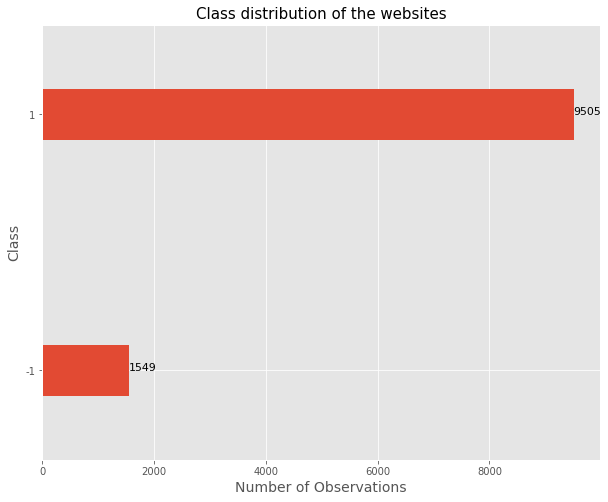

In [ ]:
# Stylize the plots
plt.style.use("ggplot")

subplot = class_dist.groupby("Class")["Num_Observations"].sum().plot(kind="barh", width=0.2, figsize=(10,8))

subplot.set_title("Class distribution of the websites", fontsize = 15)
subplot.set_xlabel("Number of Observations", fontsize = 14)
subplot.set_ylabel("Class", fontsize = 14)

for i in subplot.patches:
    subplot.text(i.get_width()+0.1, i.get_y()+0.1, \
            str(i.get_width()), fontsize=11)

we will want to change the -1 values to 0 because negative values can effect model performance. In the next code blocks we try to take care of both of these issues.

In [ ]:
print(dataset.apply(lambda col: col.unique()))

Index                  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...
UsingIP                                                          [1, -1]
LongURL                                                       [1, 0, -1]
ShortURL                                                         [1, -1]
Symbol@                                                          [1, -1]
Redirecting//                                                    [1, -1]
PrefixSuffix-                                                    [-1, 1]
SubDomains                                                    [0, -1, 1]
HTTPS                                                         [1, -1, 0]
DomainRegLen                                                     [-1, 1]
Favicon                                                          [1, -1]
NonStdPort                                                       [1, -1]
HTTPSDomainURL                                                   [-1, 1]
RequestURL                                         

In [91]:
dataset.rename(columns={"StatsReport": "Class"}, inplace=True)

dataset["Class"] = dataset["Class"].map({-1:0, 1:1})
dataset["Class"].unique()

array([1, 0])

In [95]:
dataset.isna().sum()

Index                  0
UsingIP                0
LongURL                0
ShortURL               0
Symbol@                0
Redirecting//          0
PrefixSuffix-          0
SubDomains             0
HTTPS                  0
DomainRegLen           0
Favicon                0
NonStdPort             0
HTTPSDomainURL         0
RequestURL             0
AnchorURL              0
LinksInScriptTags      0
ServerFormHandler      0
InfoEmail              0
AbnormalURL            0
WebsiteForwarding      0
StatusBarCust          0
DisableRightClick      0
UsingPopupWindow       0
IframeRedirection      0
AgeofDomain            0
DNSRecording           0
WebsiteTraffic         0
PageRank               0
GoogleIndex            0
LinksPointingToPage    0
Class                  0
class                  0
dtype: int64

We can see that the data does NOT have any missing values.

Let's also take a look at all of the distinct values for the columns to double-check the null analysis and see if there's any other possible weirdness with the data.

In [6]:
def summarize_dataset(dataset,column_name):
    '''Output a dataframe containing the row count for each unique value 
    in column column_name for dataframe dataset'''
    distinct_values = dict(Counter(dataset[column_name]))
    ds = pd.Series(distinct_values, name = 'Num_Observations')
    ds.index.name = column_name
    distinct_values = ds.reset_index()
    return distinct_values

#Generate summary of all columns
for column_name in dataset:
    display(summarize_dataset(dataset,column_name))

,Index,Num_Observations
0,0,1
1,1,1
2,2,1
3,3,1
4,4,1
...,...,...
11049,11049,1
11050,11050,1
11051,11051,1
11052,11052,1


,UsingIP,Num_Observations
0,1,7262
1,-1,3792


,LongURL,Num_Observations
0,1,1959
1,0,135
2,-1,8960


,ShortURL,Num_Observations
0,1,9610
1,-1,1444


,Symbol@,Num_Observations
0,1,9399
1,-1,1655


,Redirecting//,Num_Observations
0,1,9626
1,-1,1428


,PrefixSuffix-,Num_Observations
0,-1,9589
1,1,1465


,SubDomains,Num_Observations
0,0,3622
1,-1,3362
2,1,4070


,HTTPS,Num_Observations
0,1,6331
1,-1,3556
2,0,1167


,DomainRegLen,Num_Observations
0,-1,7388
1,1,3666


,Favicon,Num_Observations
0,1,9001
1,-1,2053


,NonStdPort,Num_Observations
0,1,9552
1,-1,1502


,HTTPSDomainURL,Num_Observations
0,-1,1795
1,1,9259


,RequestURL,Num_Observations
0,1,6559
1,-1,4495


,AnchorURL,Num_Observations
0,0,5337
1,-1,3281
2,1,2436


,LinksInScriptTags,Num_Observations
0,-1,3956
1,0,4449
2,1,2649


,ServerFormHandler,Num_Observations
0,-1,8439
1,1,1854
2,0,761


,InfoEmail,Num_Observations
0,1,9041
1,-1,2013


,AbnormalURL,Num_Observations
0,1,9426
1,-1,1628


,WebsiteForwarding,Num_Observations
0,0,9775
1,1,1279


,StatusBarCust,Num_Observations
0,1,9739
1,-1,1315


,DisableRightClick,Num_Observations
0,1,10578
1,-1,476


,UsingPopupWindow,Num_Observations
0,1,8917
1,-1,2137


,IframeRedirection,Num_Observations
0,1,10042
1,-1,1012


,AgeofDomain,Num_Observations
0,-1,5188
1,1,5866


,DNSRecording,Num_Observations
0,-1,3442
1,1,7612


,WebsiteTraffic,Num_Observations
0,0,2569
1,1,5831
2,-1,2654


,PageRank,Num_Observations
0,-1,8200
1,1,2854


,GoogleIndex,Num_Observations
0,1,9515
1,-1,1539


,LinksPointingToPage,Num_Observations
0,1,4350
1,0,6156
2,-1,548


,StatsReport,Num_Observations
0,1,9505
1,-1,1549


,class,Num_Observations
0,-1,4897
1,1,6157
